In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# re-size all the images to this
IMAGE_SIZE = (100,100)
path="/content/drive/MyDrive/New_Data_CoV2"
data=[]
c=0
for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for folder2 in os.listdir(sub_path):
      sub_path2=sub_path+"/"+folder2
      for img in os.listdir(sub_path2):
        image_path=sub_path2+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
          img_arr=cv2.resize(img_arr,IMAGE_SIZE)
          
          data.append(img_arr)
        except:
          c+=1
          continue
print("Number of images skipped= ",c)

Number of images skipped=  2


In [ ]:
x=np.array(data)

In [ ]:
x=x/255.0

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')

Found 4171 images belonging to 3 classes.


In [ ]:
dataset.class_indices
y=dataset.classes
y.shape

(4171,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape
x_val.shape,y_val.shape
x_test.shape,y_test.shape

((418, 100, 100, 3), (418,))

In [ ]:
model=Sequential()
#convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

In [ ]:
#convolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

In [ ]:
#convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

In [ ]:
#convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

In [ ]:
#i/p layer
model.add(Flatten())


In [ ]:
#o/p layer
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                      

In [ ]:
#compile model:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,callbacks=[early_stop],shuffle=True)

Epoch 1/30
94/94 [==============================] - 39s 405ms/step - loss: 1.0028 - accuracy: 0.5746 - val_loss: 1.0281 - val_accuracy: 0.5193
Epoch 2/30
94/94 [==============================] - 37s 389ms/step - loss: 0.6748 - accuracy: 0.7055 - val_loss: 1.1283 - val_accuracy: 0.4567
Epoch 3/30
94/94 [==============================] - 37s 392ms/step - loss: 0.5202 - accuracy: 0.7988 - val_loss: 1.2610 - val_accuracy: 0.4993
Epoch 4/30
94/94 [==============================] - 37s 394ms/step - loss: 0.3772 - accuracy: 0.8624 - val_loss: 1.0458 - val_accuracy: 0.4208
Epoch 5/30
94/94 [==============================] - 37s 392ms/step - loss: 0.2593 - accuracy: 0.9194 - val_loss: 0.9333 - val_accuracy: 0.5686
Epoch 6/30
94/94 [==============================] - 37s 393ms/step - loss: 0.1665 - accuracy: 0.9557 - val_loss: 1.1021 - val_accuracy: 0.5486
Epoch 7/30
94/94 [==============================] - 37s 394ms/step - loss: 0.0964 - accuracy: 0.9820 - val_loss: 0.9296 - val_accuracy: 0.6125

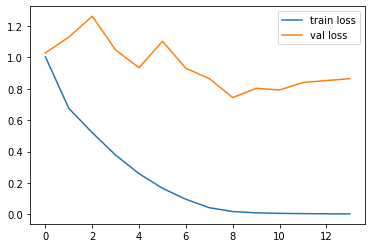

In [ ]:
#loss graph
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

In [ ]:
plt.savefig('loss-graph.png')
plt.show()

<Figure size 432x288 with 0 Axes>

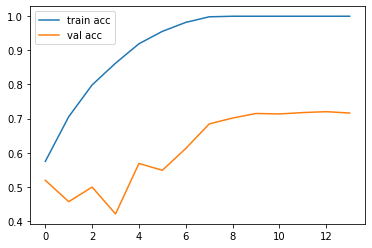

In [ ]:
# accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

In [ ]:
plt.savefig('acc-graph.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
y_val_pred=model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       462
           1       0.37      0.65      0.47        79
           2       0.68      0.72      0.70       210

    accuracy                           0.72       751
   macro avg       0.64      0.70      0.65       751
weighted avg       0.76      0.72      0.73       751



In [ ]:
confusion_matrix(y_val_pred,y_val)

array([[335,  68,  59],
       [ 17,  51,  11],
       [ 38,  20, 152]])

In [ ]:

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       232
           1       0.45      0.65      0.53        55
           2       0.76      0.74      0.75       131

    accuracy                           0.74       418
   macro avg       0.68      0.72      0.69       418
weighted avg       0.76      0.74      0.74       418



array([[175,  30,  27],
       [ 16,  36,   3],
       [ 20,  14,  97]])

In [ ]:
model.save('/content/drive/MyDrive/model.h5')